In [ ]:
pip install mlxtend --upgrade --no-deps

In [ ]:
import pandas as pd
flores = pd.read_csv('/content/iris.csv')
flores.sample(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
64,5.6,2.9,3.6,1.3,Versicolor
117,7.7,3.8,6.7,2.2,Virginica
142,5.8,2.7,5.1,1.9,Virginica
41,4.5,2.3,1.3,0.3,Setosa
21,5.1,3.7,1.5,0.4,Setosa


In [ ]:
flores_simple = flores.drop(columns=['sepal.width','petal.width'])
flores_simple.columns = ['sepal','petal','variety'] #Uso nada más el length
flores_simple.sample(5)

,sepal,petal,variety
87,6.3,4.4,Versicolor
43,5.0,1.6,Setosa
45,4.8,1.4,Setosa
54,6.5,4.6,Versicolor
95,5.7,4.2,Versicolor


In [ ]:
#Me quedo solo con dos variedades (Setosa y Versicolor)
flores_filter = flores_simple.query("variety != 'Virginica'")
flores_filter.sample(5)

,sepal,petal,variety
58,6.6,4.6,Versicolor
75,6.6,4.4,Versicolor
93,5.0,3.3,Versicolor
52,6.9,4.9,Versicolor
89,5.5,4.0,Versicolor


In [ ]:
flores_filter.shape

(100, 3)

In [ ]:
#Cambio a los valores objeto a binario para poder entrenar el modelo
flores_filter['variety'] = flores_filter['variety'].replace({'Setosa': 0, 'Versicolor': 1})
flores_filter.sample(5)

<ipython-input-6-a62c7080d617>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  flores_filter['variety'] = flores_filter['variety'].replace({'Setosa': 0, 'Versicolor': 1})
<ipython-input-6-a62c7080d617>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flores_filter['variety'] = flores_filter['variety'].replace({'Setosa': 0, 'Versicolor': 1})


,sepal,petal,variety
55,5.7,4.5,1
15,5.7,1.5,0
53,5.5,4.0,1
24,4.8,1.9,0
49,5.0,1.4,0


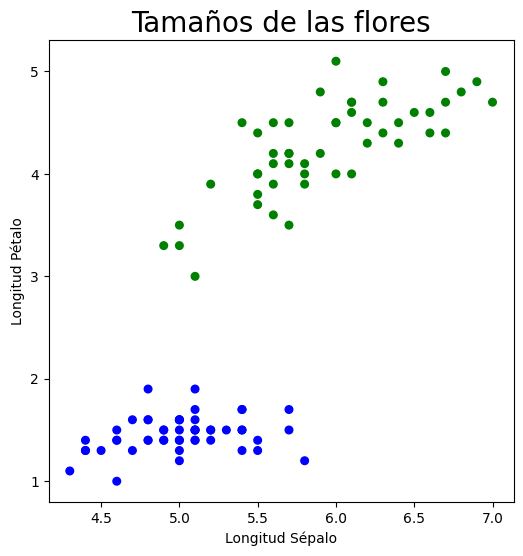

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize = (6,6))

ax = fig.add_subplot()
ax.set_xlabel('Longitud Sépalo')
ax.set_ylabel('Longitud Pétalo')
ax.set_title('Tamaños de las flores', fontsize = 20)

color_theme = np.array(['blue', 'green'])
ax.scatter(x = flores_filter.sepal,
           y = flores_filter.petal,
           c = color_theme[flores_filter.variety],
           s = 30) #Te agranda el tamaño del puntito

plt.show()

In [ ]:
#Separo los x
x = flores_filter.iloc[:,0:2].values
x

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.4],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

In [ ]:
#Separo los y
y = flores_filter.iloc[:,-1].values
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, #Defino que voy a usar el 20% de mi muestra para testear
                                                    random_state = 5)      #El random state me permite trabajar con las mismas muestras, cada vez que lo ejecute

In [ ]:
# Función del perceptrón --> Con input las variables, los pesos y el beta
def clasificar(x, w1, w2, b):
    # x is now a NumPy array representing a row [sepal, petal]
    # We need to access features by index
    return 1 if (w1 * x[0] + w2 * x[1] + b) >= 0 else 0

# Función de entrenamiento del perceptrón
def entrenar(x_data, y_data, lr=0.01):
    w1 = w2 = b = 0  # Inicialización de los parámetros
    todos_correctos = False  # Indicador de si todos los puntos están correctamente clasificados

    while not todos_correctos:
        todos_correctos = True  # Inicialmente asumimos que todos los puntos están correctamente correctamente clasificados
        # Itera por las filas de los arrays NumPy
        for i in range(len(x_data)):
            x_row = x_data[i] # Obtiene la fila de features
            etiqueta_real = y_data[i]  # Obtiene la etiqueta real
            clase = clasificar(x_row, w1, w2, b)  # Clasifica la fila

            # Si hay un error en la clasificación, actualizamos los pesos
            if etiqueta_real == 1 and clase == 0:  # Versicolor mal clasificado como Setosa
                w1 += x_row[0] * lr
                w2 += x_row[1] * lr
                b += 1 * lr
                todos_correctos = False  # Al haber un error, debemos seguir iterando
            elif etiqueta_real == 0 and clase == 1:  # Setosa mal clasificado como Versicolor
                w1 -= x_row[0] * lr
                w2 -= x_row[1] * lr
                b -= 1 * lr
                todos_correctos = False  # Al haber un error, debemos seguir iterando

        print("Pesos actuales: w1:", w1, "w2:", w2, "b:", b)

    return w1, w2, b

def probar(x_data, y_data, w1, w2, b):
    correctos = 0
    incorrectos = 0
    for i in range(len(x_data)):  # Itera por las filas de los arrays NumPy
        x_row = x_data[i] # Obtiene la fila de features
        clase = clasificar(x_row, w1, w2, b)  # Clasifica la fila
        etiqueta_real = y_data[i] # Obtiene la etiqueta real

        if clase == etiqueta_real:
            correctos += 1
        else:
            incorrectos += 1

    print("\n\nResultados de evaluación:")
    print(f"Correctos: {correctos} - {(correctos / len(x_data)) * 100}%")
    print(f"Incorrectos: {incorrectos} - {(incorrectos / len(x_data)) * 100}%")

# Entrenar el modelo
w1, w2, b = entrenar(x_train, y_train) # Pass both x_train and y_train

# Evaluar el modelo en el conjunto de prueba
probar(x_test, y_test, w1, w2, b) # Pass both x_test and y_test

Pesos actuales: w1: -0.02500000000000001 w2: 0.048 b: -0.01
Pesos actuales: w1: -0.02500000000000001 w2: 0.048 b: -0.01


Resultados de evaluación:
Correctos: 20 - 100.0%
Incorrectos: 0 - 0.0%


In [ ]:
#Calculo la regresión lineal
from sklearn.linear_model import Perceptron
perceptron = Perceptron()
perceptron.fit(x_train, y_train)

Perceptron()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = perceptron.predict(x_test)
accuracy_score(y_test, y_pred)

1.0

<Axes: >

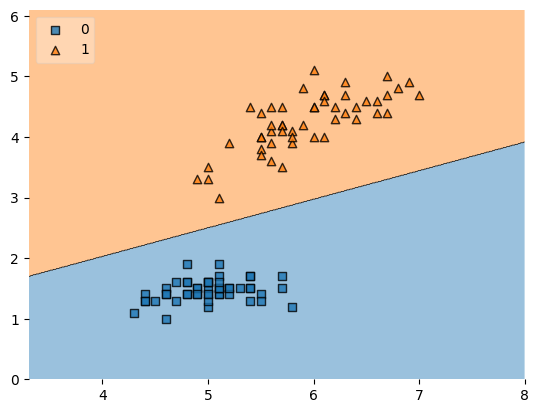

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x,y,perceptron,legend=2)